Dataset of the Project Wordle Optimization using Information Theory is a list of 5 letter words obtained by web scraping through source code of wordle website.
![WebScrapingWords](https://github.com/suhasAB/WordleOptimizer/blob/main/paper/images/wordle%20words%20webscraping.png?raw=true)

In [1]:
import json
import urllib.request
import pandas as pd
import numpy as np

In [2]:
with open(r'./data/raw/raw_wordle_script.txt', encoding='utf-8') as f:
    wordle_script = f.read()
    
raw_word_list = wordle_script.split('var La=[')[1].split('],Ia="present"')[0]

raw_words = raw_word_list.split(',')
wordle_words = []
for raw_word in raw_words:
    word = raw_word.strip('"')
    wordle_words.append(word)

# fix two errors at the intersection of the recognizable words list La and all words list Ta
wordle_words[2314] = 'shave'
wordle_words[2315] = 'aahed'

curated_words = wordle_words[:2315]

with open(r'data/processed/wordle_words.json', 'w') as outfile:
    json.dump(wordle_words, outfile)
    

In [3]:
print(len(wordle_words))
print(len(curated_words))

12972
2315


We have to combine Entropy with Relative word frequency probabiliy to evaluate the best. 
To find the Frequency of English words,we use Google books common words frequency evaluation dataset available at http://norvig.com/google-books-common-words.txt. This list contains words of all charecter lenghts. We have filtered out 5 letter words using below code and maps them in a tuple pair,with decreasing order of relative frequency.

In [4]:
#filtering out most frequent 5 letter words from google-books-common-words
five_letter_frequency = []
for line in urllib.request.urlopen(r'http://norvig.com/google-books-common-words.txt'):
    line = (line.decode('utf-8')).split('\t')
    word = line[0].lower()
    freq = line[1].split('\n')[0]
    if len(word) == 5:
        five_letter_frequency.append((word, freq))

In [5]:
#Top 20 most frequently used English 5 letter words
for i in range(20):
    print(five_letter_frequency[i])

('which', '3140226612')
('their', '2152980325')
('there', '1623700147')
('would', '1472811049')
('other', '1383185827')
('these', '1305787385')
('about', '1070877995')
('first', '923189150')
('could', '886891028')
('after', '802220137')
('those', '691668501')
('where', '671644491')
('being', '616194541')
('under', '585610545')
('years', '563247544')
('great', '557149997')
('state', '553386027')
('world', '505870068')
('three', '487787199')
('while', '483440546')


             freq  rel_freq
0                          
which  3140226612  1.000000
their  2152980325  0.685613
there  1623700147  0.517065
would  1472811049  0.469014
other  1383185827  0.440473


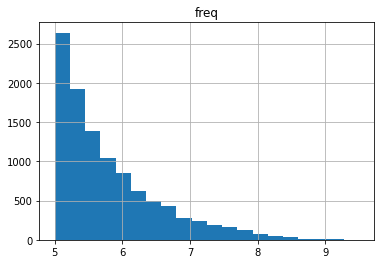

In [6]:
#Calculating Relative Frequency and comparing it with Absolute Frequency of Most Common Words
flw_freqdf = pd.DataFrame(five_letter_frequency).set_index(0).astype('int64')
flw_freqdf.columns = ['freq'] 
np.log10(flw_freqdf).hist(bins=20)
flw_freqdf['rel_freq'] = flw_freqdf / flw_freqdf.max()
flw_freqdf.to_csv(r'..\data\processed\flw_with_frequencies.csv')
print(flw_freqdf.head(5))

In [7]:
!jupyter nbconvert 1_PreProcessing_SuhasAnand.ipynb --to python

[NbConvertApp] Converting notebook 1_PreProcessing_SuhasAnand.ipynb to python
[NbConvertApp] Writing 2560 bytes to 1_PreProcessing_SuhasAnand.py
